In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
df.head(10)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


In [5]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [6]:
df.isna().any()

Case_No                   False
A1                        False
A2                        False
A3                        False
A4                        False
A5                        False
A6                        False
A7                        False
A8                        False
A9                        False
A10                       False
Age_Mons                  False
Qchat-10-Score            False
Sex                       False
Ethnicity                 False
Jaundice                  False
Family_mem_with_ASD       False
Who completed the test    False
Class/ASD Traits          False
dtype: bool

In [7]:
# Need to drop data that is not important
df = df.drop(["Case_No", "Qchat-10-Score"],axis = 'columns')
df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,family member,Yes
5,1,1,0,0,1,1,1,1,1,1,21,m,black,no,no,family member,Yes
6,1,0,0,1,1,1,0,0,1,0,33,m,asian,yes,no,family member,Yes
7,0,1,0,0,1,0,1,1,1,1,33,m,asian,yes,no,family member,Yes
8,0,0,0,0,0,0,1,0,0,1,36,m,asian,no,no,family member,No
9,1,1,1,0,1,1,0,1,1,1,22,m,south asian,no,no,Health Care Professional,Yes


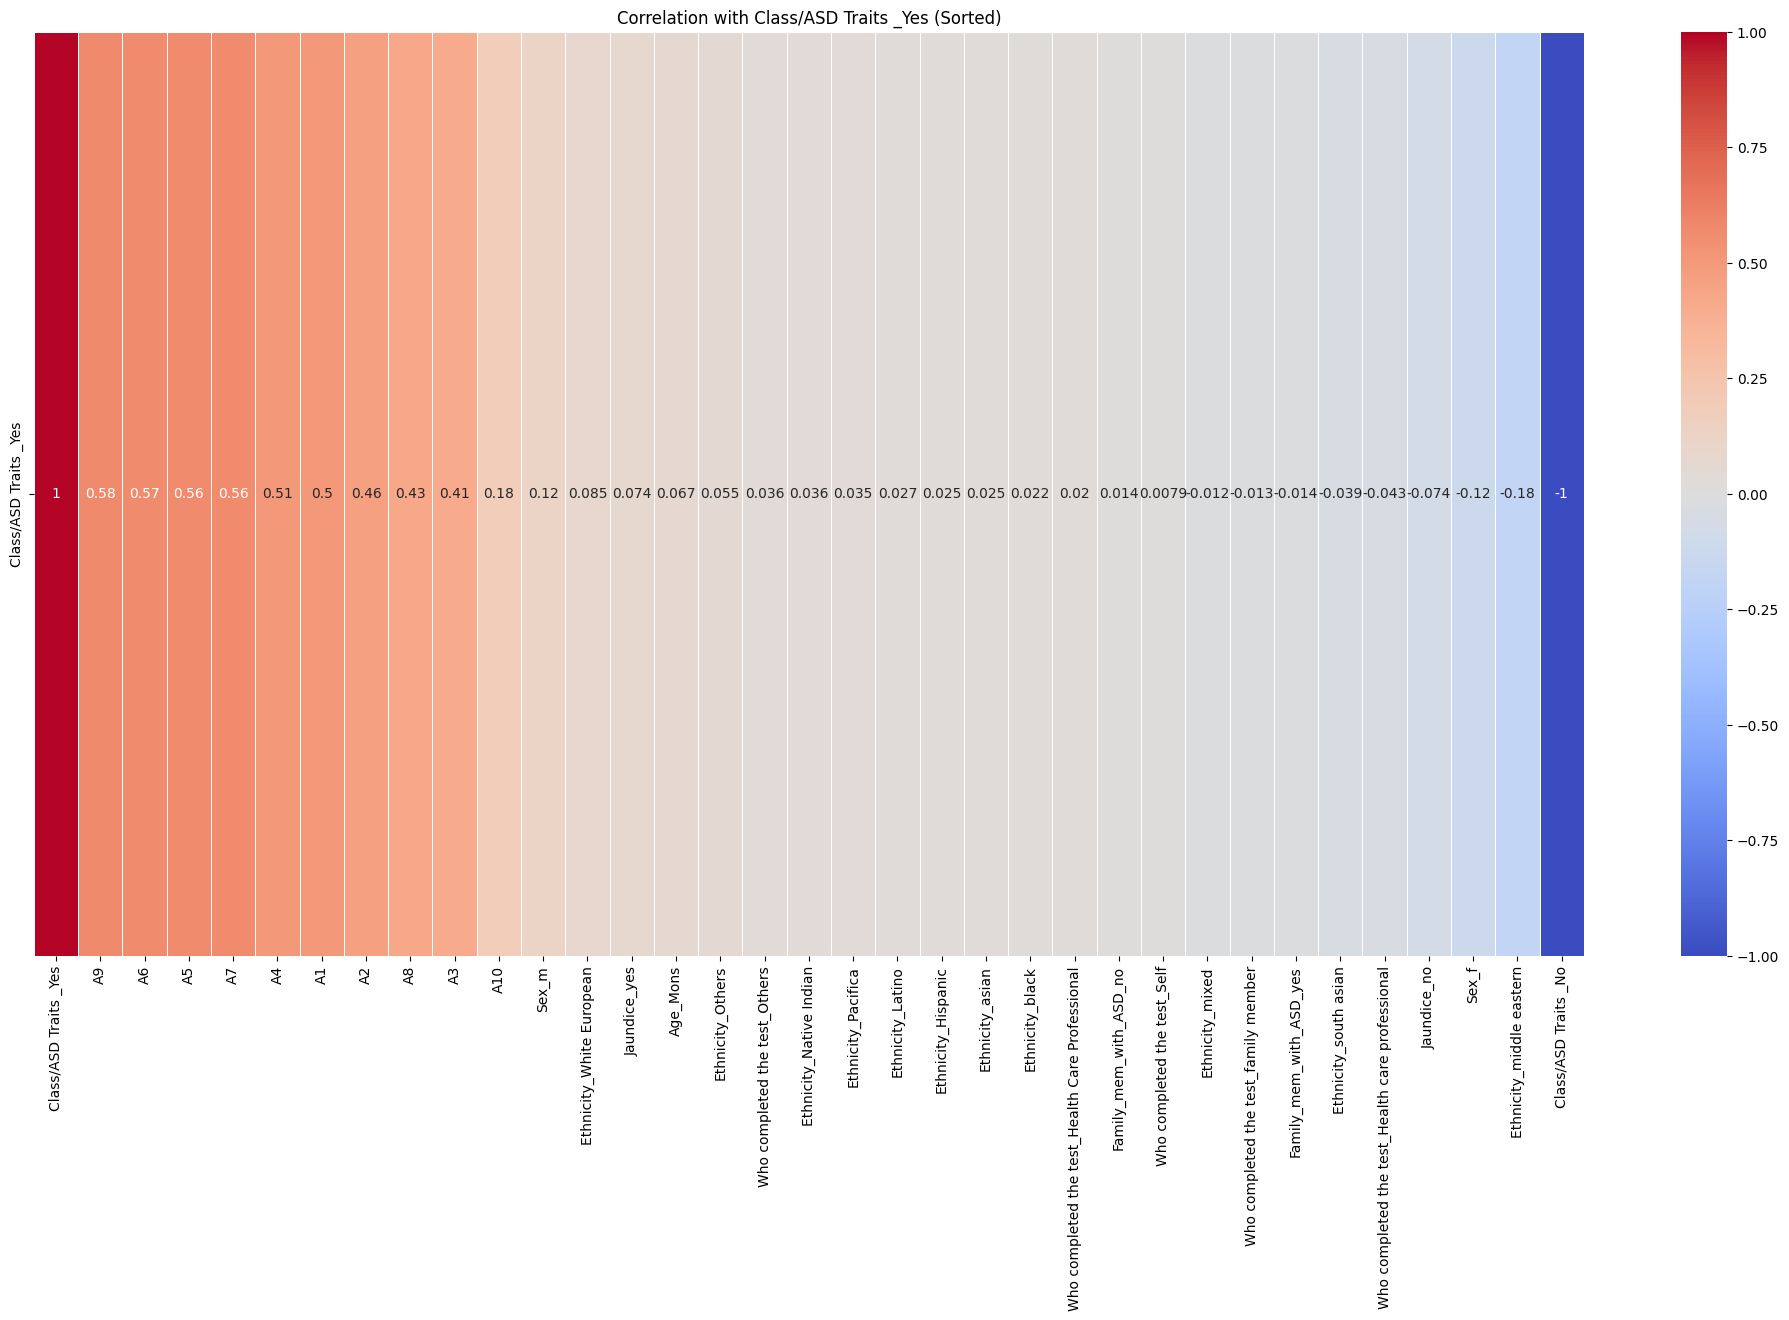

In [8]:
# Get the correlation matrix

df_encoded = pd.get_dummies(df, columns=["Sex", "Ethnicity", "Jaundice", "Family_mem_with_ASD", "Who completed the test", "Class/ASD Traits "])

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

target_correlation = correlation_matrix['Class/ASD Traits _Yes']

sorted_correlation = target_correlation.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(25, 12))
sns.heatmap(correlation_matrix[sorted_correlation.index].loc[['Class/ASD Traits _Yes'], :], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with Class/ASD Traits _Yes (Sorted)')
plt.show()


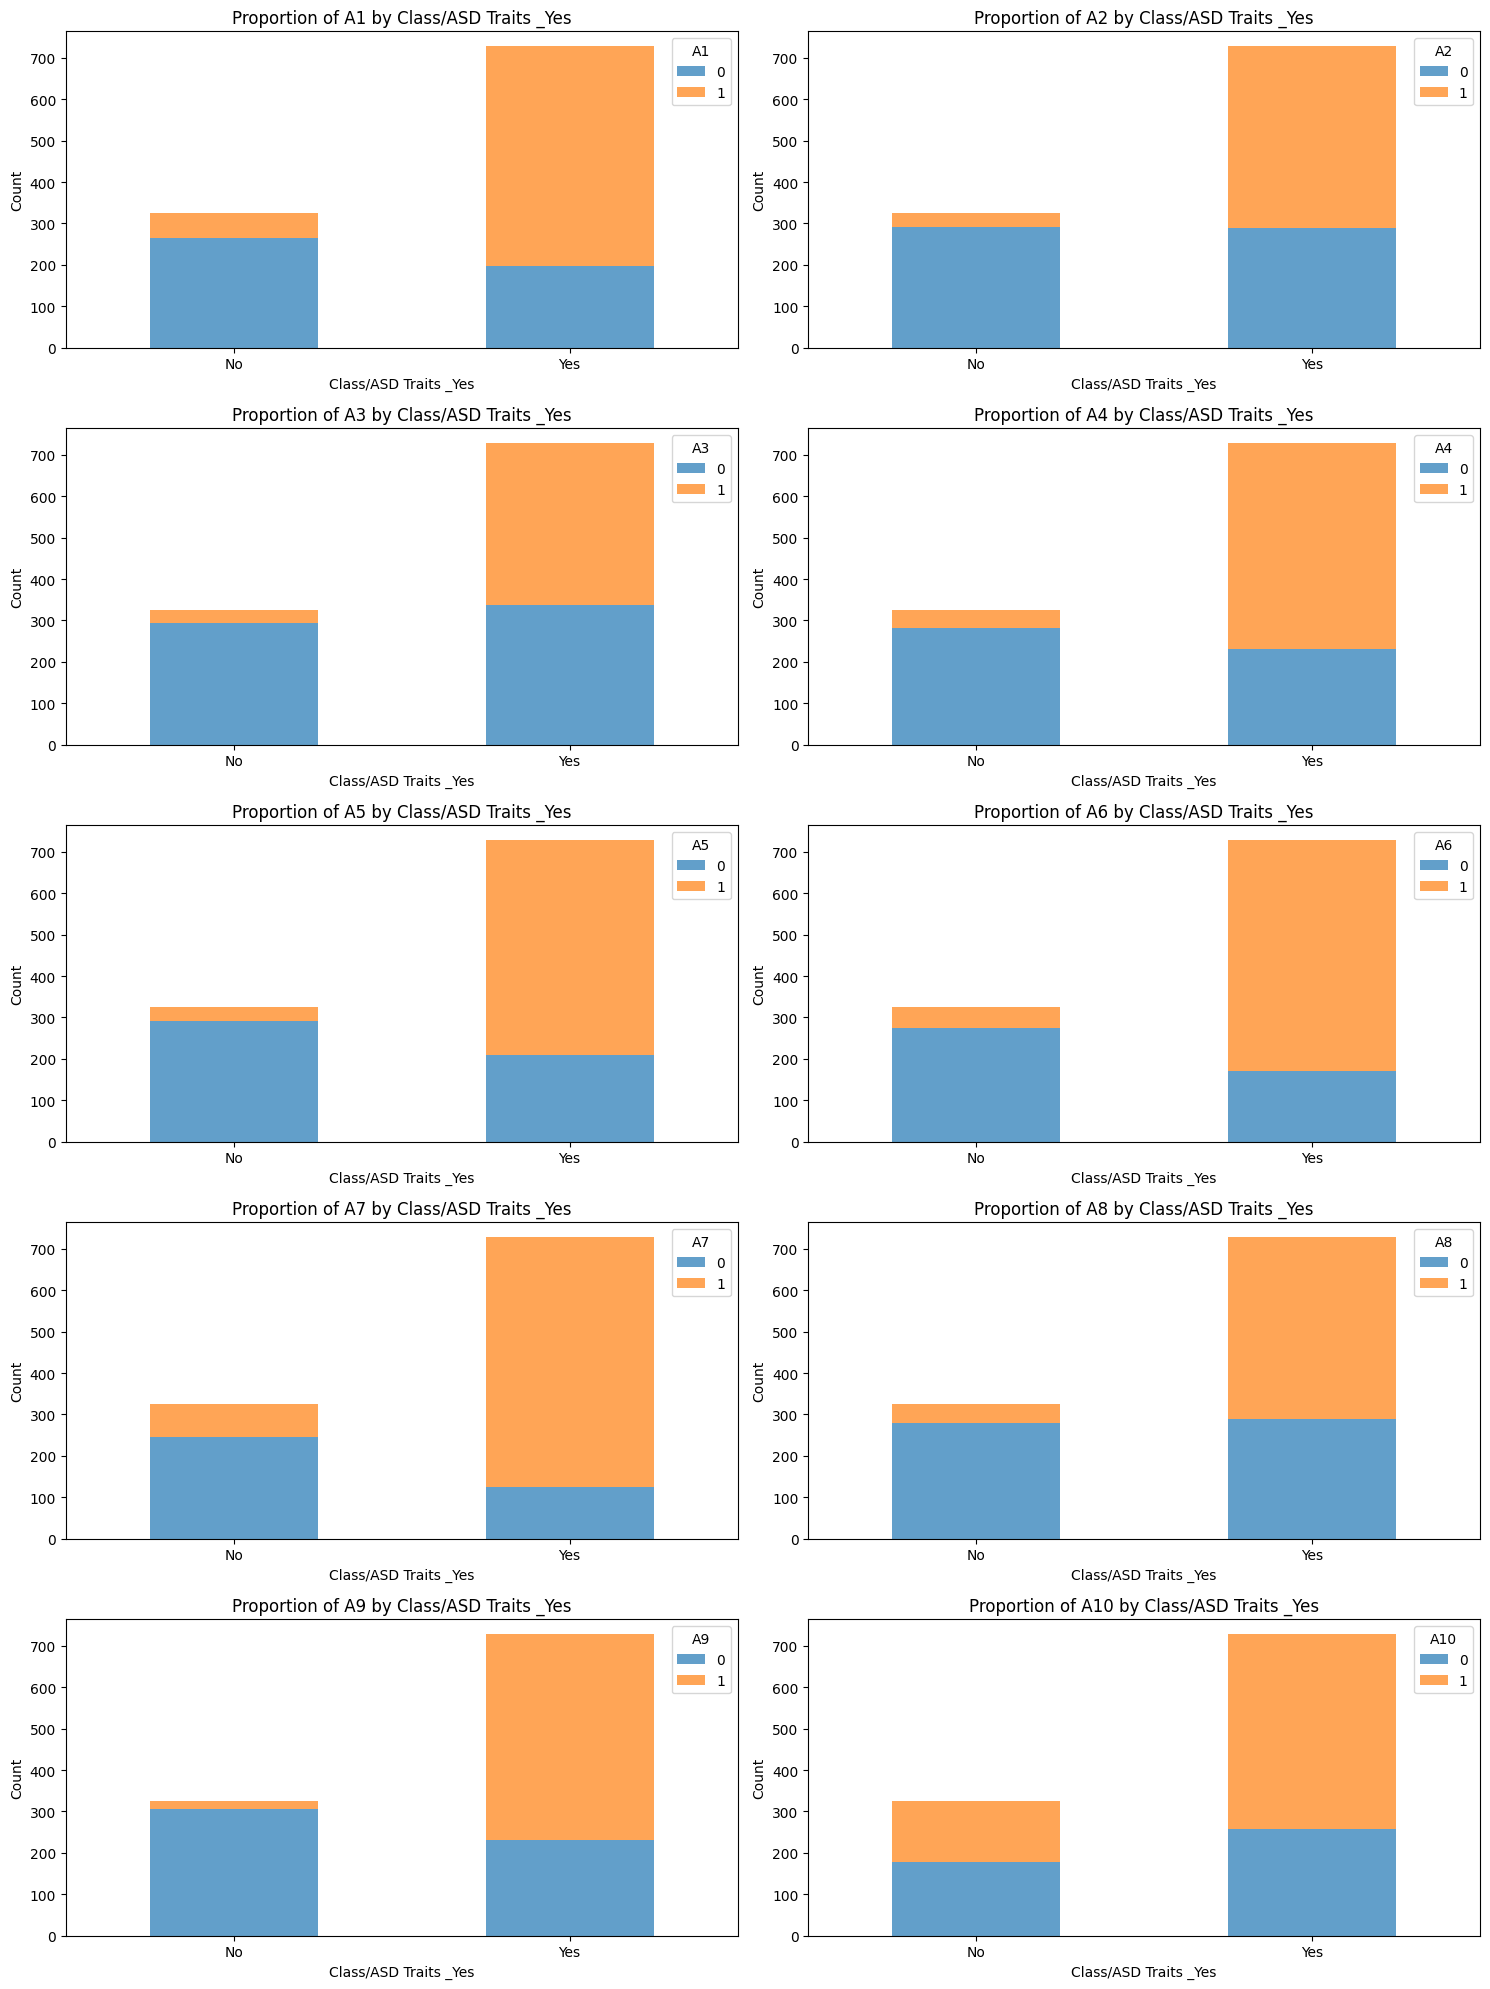

In [9]:
# The Questionaire answers are the only variables that were found out that matters for the ADD diagnosys
# Some dispersions graphs were used to visualize the variables change more

binary_variable_prefix = 'A'

# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Plotting
for i, ax in enumerate(axes.flatten(), 1):
    var = f"{binary_variable_prefix}{i}"
    grouped_data = df_encoded.groupby(['Class/ASD Traits _Yes', var]).size().unstack()
    grouped_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], alpha=0.7, ax=ax)
    ax.set_title(f'Proportion of {var} by Class/ASD Traits _Yes')
    ax.set_xlabel('Class/ASD Traits _Yes')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Yes'], rotation=0)
    ax.legend(title=var, loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

In [28]:
for i, col1 in enumerate(df_encoded.columns):
    for j, col2 in enumerate(df_encoded.columns):
        if i < j:
            correlation = correlation_matrix.loc[col1, col2]
            if abs(correlation) >= 0.95:
                print(f"Correlation between '{col1}' and '{col2}': {correlation}")

Correlation between 'Sex_f' and 'Sex_m': -1.0
Correlation between 'Jaundice_no' and 'Jaundice_yes': -1.0
Correlation between 'Family_mem_with_ASD_no' and 'Family_mem_with_ASD_yes': -1.0000000000000002
Correlation between 'Class/ASD Traits _No' and 'Class/ASD Traits _Yes': -1.0000000000000004


In [32]:
# Conclusion -> No correlation between any two pairs of variables (Just the trivial correlations)

# Need ot check the balance between Yes and No diagnosis

unique_counts = df_encoded["Class/ASD Traits _Yes"].value_counts()

print(unique_counts)



Class/ASD Traits _Yes
True     728
False    326
Name: count, dtype: int64
